In [629]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [630]:
os.chdir('D:\py\Logistic Regression')

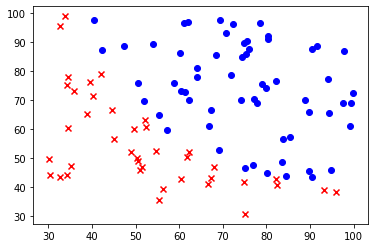

In [631]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')

In [632]:
df = pd.read_csv('ex2data1.txt', header=None)
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [633]:
y.shape

(100,)

In [634]:
positive = np.where(y==1)
negative = np.where(y==0)

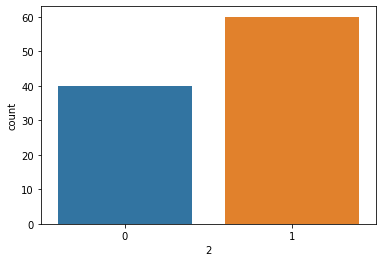

In [635]:
sns.countplot(df.iloc[:,2])

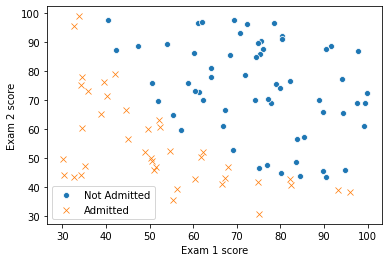

In [636]:
sns.scatterplot(x=X.iloc[positive][0],y=X.iloc[positive][1], marker='o')
sns.scatterplot(x=X.iloc[negative][0],y=X.iloc[negative][1], marker='x')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])

# Cost Function
h wt(x) = g(wt' x) = g(z)
g(z) = 1/ (1 + np.e^-z)

In [637]:
#z = np.dot(theta.T, X)
def sigmoid(z):
    sigmoid_expr = 1/ (1 + np.exp(-z))
    return sigmoid_expr

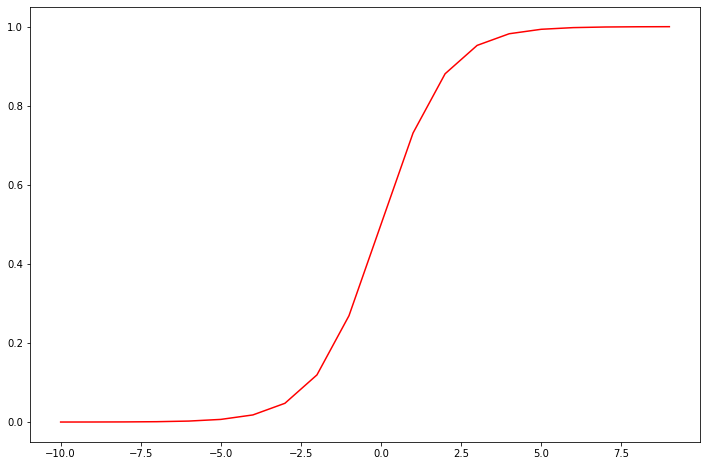

In [638]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [659]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [661]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(np.dot(X,theta.T)) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [662]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [663]:
# add a ones column - this makes the matrix multiplication work out easier
data = pd.read_csv('ex2data1.txt', header=None)
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros((3,1))
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
print(result)


(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)


In [647]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
